In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
import datetime

In [3]:
pd.set_option('display.max_rows', 99999)
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [4]:
epc_49 = pd.read_csv('epc_encoded.csv')
##epc_encoded from previous step(preprocessing)
epc_49.shape

(54495, 94)

In [5]:
epc_49.head(1)

Unnamed: 0  Total floor area (m²)  \
0           0                   45.0   

   Total current energy costs over 3 years (£)  \
0                                       3771.0   

   Current energy efficiency rating band  \
0                                      4   

   Current heating costs over 3 years (£)  \
0                                  2478.0   

   Current hot water costs over 3 years (£)  \
0                                    1176.0   

   Current lighting costs over 3 years (£)  Part 1 Construction Age Band  \
0                                    117.0                            10   

   Part 1 Floor 0 Room Height  Fixed Lighting Outlets Count  \
0                         3.1                           6.0   

   Low Energy Lighting Outlets Count  Low Energy Lighting %  Glazed Area  \
0                                6.0                  100.0          1.0   

   Habitable Room Count  Heated Room Count  Mechanical Ventilation  \
0                   2.0                2.0                       2   

   Meter Type  Solar Water Heating  Tenure  Transaction Type  Property Type  \
0           2                    0       0                 7              1   

   insulated_wall  insulated_roof  insulated_floor  wall_type  roof_type  \
0               0               1                0          5          1   

   floor_type  windows_glazing  MHS_boiler  MHS_radiators  \
0           4                0       False          False   

   MHS_electric heaters  MHS_heat pump  MHS_room heaters  \
0                 False          False              True   

   MHS_community scheme  MHS_underfloor heating  MHS_warm air  MMH_mains gas  \
0                 False                   False         False          False   

   MHS_None  MHS_electric  MHS_oil  MHS_underfloor heating   MHS_lpg  \
0     False          True    False                    False    False   

   MHS_dual fuel mineral and wood   MHS_wood pellets_logs  other  MHS_coal  \
0                            False                  False  False     False   

   MHS_other  MHCS_programmer  MHCS_time and temperature zone control  \
0      False             True                                   False   

   MHCS_manual charge control  MHCS_room thermostat(s)  \
0                       False                    False   

   MHCS_appliance thermostats  \
0                        True   

   MHCS_controls for high heat retention storage heaters  \
0                                              False       

   MHCS_automatic charge control  \
0                          False   

   MHCS_charging system linked to use of community heating  \
0                                              False         

   MHCS_flat rate charging  MHCS_trvs  MHCS_bypass  MHCS_none  \
0                    False      False        False      False   

   MHCS_no time or thermostatic control of room temperature  MHCS_other  \
0                                              False              False   

   MHCS_boiler energy manager  hws_from main system  \
0                       False                 False   

   hws_from secondary system  hws_community scheme  hws_electric immersion  \
0                      False                 False                    True   

   hws_electric instantaneous at point of use  hws_heat pump  \
0                                       False          False   

   hws_gas multipoint  hws_gas instantaneous at point of use   hws_other  \
0               False                                   False      False   

   hws_None  hws_off-peak  hws_no cylinder thermostat  hws_standard tariff  \
0     False          True                       False                False   

   hws_flue gas heat recovery  hws_plus solar  hws_waste water heat recovery  \
0                       False           False                          False   

   low_lighting  SH_room heaters  SH_none  SH_electric  SH_mains gas  \
0             2            False     True        False         False   

   SH_po

In [6]:
df_x = epc_49.drop(['Current energy efficiency rating band'], axis = 1)
def drop_correlated_features(dataframe, threshold):
    '''remove correlated features'''
    
    corr_matrix = dataframe.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    dataframe = dataframe.drop(to_drop, axis=1)
    print('Removed Columns {}'.format(to_drop))
    return dataframe

epc = drop_correlated_features(df_x,0.6)
epc['Current energy efficiency rating band']= epc_49['Current energy efficiency rating band']

Removed Columns ['Current heating costs over 3 years (£)', 'Current lighting costs over 3 years (£)', 'Fixed Lighting Outlets Count', 'Low Energy Lighting Outlets Count', 'Habitable Room Count', 'Heated Room Count', 'MHS_boiler', 'MHS_electric', 'MHCS_time and temperature zone control', 'MHCS_appliance thermostats', 'MHCS_charging system linked to use of community heating', 'MHCS_flat rate charging', 'MHCS_trvs', 'hws_from main system', 'hws_community scheme', 'hws_electric immersion', 'hws_off-peak', 'hws_plus solar', 'SH_none', 'SH_electric']


In [7]:
epc.head(2)

Unnamed: 0  Total floor area (m²)  \
0           0                   45.0   
1           1                  143.0   

   Total current energy costs over 3 years (£)  \
0                                       3771.0   
1                                       2793.0   

   Current hot water costs over 3 years (£)  Part 1 Construction Age Band  \
0                                    1176.0                            10   
1                                     375.0                             8   

   Part 1 Floor 0 Room Height  Low Energy Lighting %  Glazed Area  \
0                         3.1                  100.0          1.0   
1                         2.4                  100.0          1.0   

   Mechanical Ventilation  Meter Type  Solar Water Heating  Tenure  \
0                       2           2                    0       0   
1                       2           0                    0       0   

   Transaction Type  Property Type  insulated_wall  insulated_roof  \
0                 7              1               0               1   
1                 4              2               1               1   

   insulated_floor  wall_type  roof_type  floor_type  windows_glazing  \
0                0          5          1           4                0   
1                1          1          1           1                0   

   MHS_radiators  MHS_electric heaters  MHS_heat pump  MHS_room heaters  \
0          False                 False          False              True   
1          False                 False          False             False   

   MHS_community scheme  MHS_underfloor heating  MHS_warm air  MMH_mains gas  \
0                 False                   False         False          False   
1                 False                   False         False           True   

   MHS_None  MHS_oil  MHS_underfloor heating   MHS_lpg  \
0     False    False                    False    False   
1     False    False                    False    False   

   MHS_dual fuel mineral and wood   MHS_wood pellets_logs  other  MHS_coal  \
0                            False                  False  False     False   
1                            False                  False  False     False   

   MHS_other  MHCS_programmer  MHCS_manual charge control  \
0      False             True                       False   
1      False             True                       False   

   MHCS_room thermostat(s)  \
0                    False   
1                    False   

   MHCS_controls for high heat retention storage heaters  \
0                                              False       
1                                              False       

   MHCS_automatic charge control  MHCS_bypass  MHCS_none  \
0                          False        False      False   
1                          False        False      False   

   MHCS_no time or thermostatic control of room temperature  MHCS_other  \
0                                              False              False   
1                                              False              False   

   MHCS_boiler energy manager  hws_from secondary system  \
0                       False                      False   
1                       False                      False   

   hws_electric instantaneous at point of use  hws_heat pump  \
0                                       False          False   
1                                       False          False   

   hws_gas multipoint  hws_gas instantaneous at point of use   hws_other  \
0               False                                   False      False   
1               False                                   False      False   

   hws_None  hws_no cylinder thermostat  hws_standard tariff  \
0     False                       False                False   
1     False                       False                False   

   hws_flue gas heat recovery  hws_waste water heat recovery  low_lighting  \
0                       False      

In [8]:
epc['Current energy efficiency rating band'].value_counts()

2    24296
3    14264
1     8682
4     4703
5     1454
0      688
6      408
Name: Current energy efficiency rating band, dtype: int64

In [9]:
epc.shape

(54495, 74)

In [10]:
# # Dataset sampling for faster computation
# epc = epc.groupby('Current energy efficiency rating band', group_keys=False).apply(lambda x: x.sample(frac=0.6))

In [11]:
# epc['Current energy efficiency rating band'].value_counts()

In [12]:
epc = epc.drop('Unnamed: 0', axis=1)

In [13]:
y = epc['Current energy efficiency rating band']
X = epc.drop(['Current energy efficiency rating band'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=40,  test_size=0.3)

In [14]:
# #==========Mutual info=======#
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
#No we Will select the top 20 important features
sel_cols = SelectKBest(mutual_info_classif, k=20)
sel_cols.fit(X, y)
X.columns[sel_cols.get_support()]

TypeError: '<' not supported between instances of 'SelectKBest' and 'SelectKBest'

In [ ]:
epc_df =epc[['Total floor area (m²)', 'Total current energy costs over 3 years (£)',
       'Current hot water costs over 3 years (£)',
       'Part 1 Construction Age Band', 'Part 1 Floor 0 Room Height',
       'Low Energy Lighting %', 'Mechanical Ventilation', 'Tenure',
       'Transaction Type', 'Property Type', 'insulated_wall', 'insulated_roof',
       'wall_type', 'roof_type', 'floor_type', 'windows_glazing',
       'MMH_mains gas', 'MHCS_programmer', 'low_lighting', 'SH_room heaters', 'Current energy efficiency rating band']]

In [ ]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores = make_mi_scores(X, y)
mi_scores[::3]  # show a few features with their MI scores

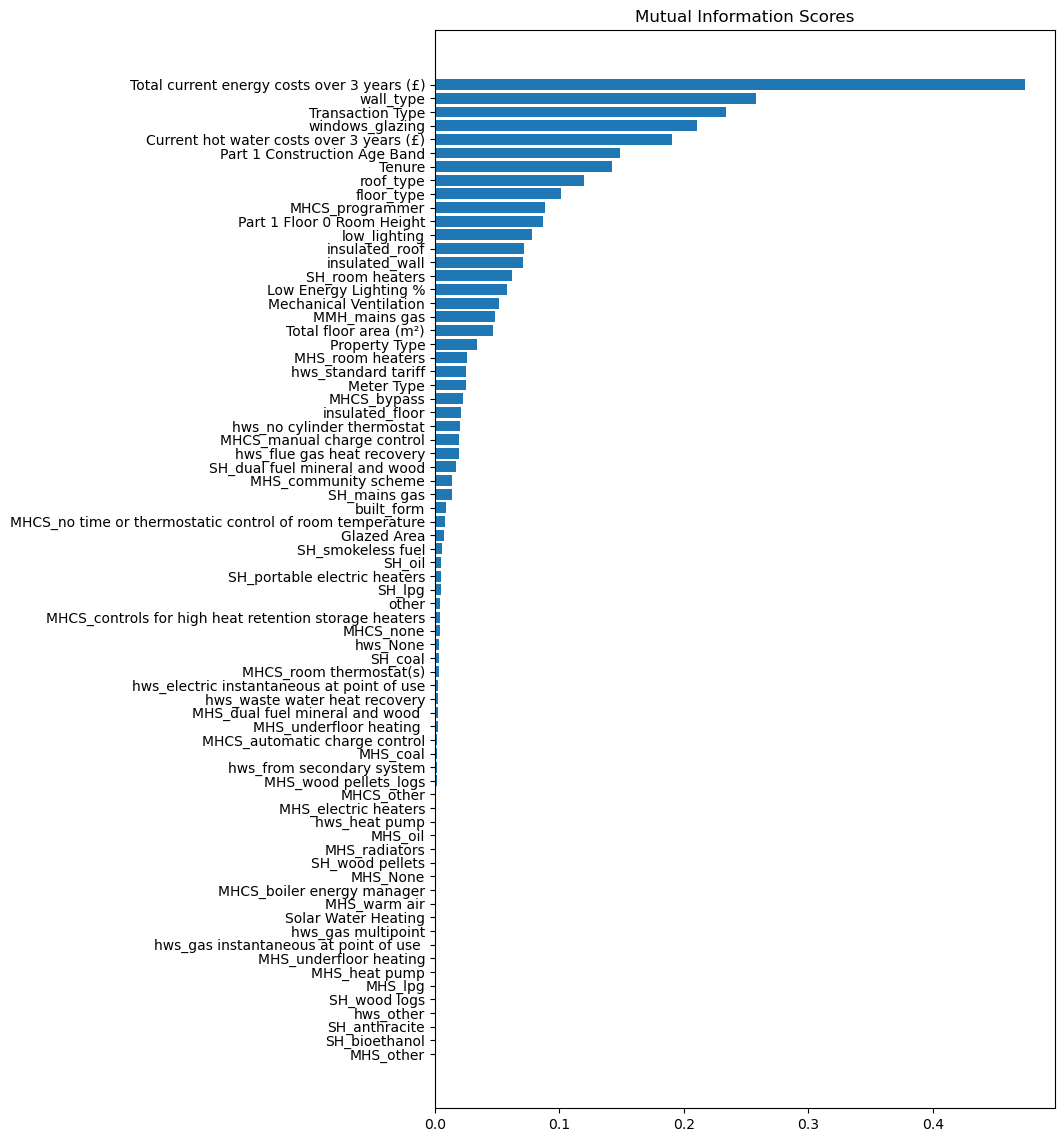

In [102]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
plt.figure(dpi=100, figsize=(8, 14))
plot_mi_scores(mi_scores)

In [106]:
epc_df.to_csv('epc_best20.csv')  

In [104]:
epc_best20.head(10)

Total floor area (m²)  Total current energy costs over 3 years (£)  \
0                   45.0                                       3771.0   
1                  143.0                                       2793.0   
2                   65.0                                       1947.0   
3                   49.0                                       1158.0   
4                  212.0                                       6477.0   
5                  247.0                                      10329.0   
6                   86.0                                       2271.0   
7                   63.0                                       4155.0   
8                  154.0                                       5301.0   
9                   96.0                                       2757.0   

   Current hot water costs over 3 years (£)  Part 1 Construction Age Band  \
0                                    1176.0                            10   
1                                     375.0                             8   
2                                     441.0                            10   
3                                     195.0                             7   
4                                     819.0                            10   
5                                     324.0                            10   
6                                     285.0                            10   
7                                    1533.0                            10   
8                                     327.0                            10   
9                                     234.0                             2   

   Part 1 Floor 0 Room Height  Low Energy Lighting %  Mechanical Ventilation  \
0                        3.10                  100.0                       2   
1                        2.40                  100.0                       2   
2                        2.45                  100.0                       2   
3                        2.40                  100.0                       2   
4                        2.80                   64.0                       2   
5                        3.10                   84.0                       2   
6                        2.40                   55.0                       2   
7                        2.56                  100.0                       2   
8                        3.15                  100.0                       2   
9                        2.40                   75.0                       2   

   Tenure  Transaction Type  Property Type  insulated_wall  insulated_roof  \
0       0                 7              1               0               1   
1       0                 4              2               1               1   
2       0                 4              1               0               1   
3       1                 7              1               1               1   
4       0                 4              2               1               1   
5       0                 4              2               0               1   
6       0                 4              2               0               1   
7       2                 8              0               1               1   
8       1                 8              1               0               0   
9       0                 4              2               0               1   

   wall_type  roof_type  floor_type  windows_glazing  MMH_mains gas  \
0          5          1           4                0          False   
1          1          1           1                0           True   
2          5          4           0                4           True   
3          1          4           1                0           True   
4          3          1           0                0          False   
5          3          1           1                0           True   
6          5          0           1                0           True   
7          1          0           0        

In [105]:
epc_best20.shape

(54495, 21)